In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt 
%matplotlib inline


import os

import json

import itertools

from pickle import load,dump



In [19]:
with open('target', 'rb') as pickle_file:
    y = load(pickle_file)

In [8]:
with open('norm_frames', 'rb') as pickle_file:
    X = load(pickle_file)

In [215]:
class_labels = {}

class_labels[0] = 'correct'
class_labels[1] = 'incorrect_chin_tuck'
class_labels[2] = 'incorrect_lean_fwd'
class_labels[3] = 'incorrect_feet_close'
class_labels[4] = 'incorrect_not_low'
class_labels[5] = 'incorrect_out_knees'

# PCA


In [13]:
from sklearn.decomposition import KernelPCA, PCA
from sklearn.preprocessing import StandardScaler


In [14]:
pca = PCA(n_components = 40)
pca.fit(X)

PCA(n_components=40)

Text(0, 0.5, 'Explained variance')

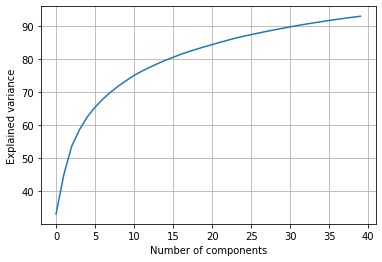

In [15]:
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [17]:
X_t = pca.transform(X)
X_t.shape

(296, 40)

## Creating the different folds to be used when scoring the models


In [24]:
from sklearn.model_selection import KFold,StratifiedKFold,LeaveOneOut,ShuffleSplit,cross_val_score,GridSearchCV, RandomizedSearchCV


In [108]:
k_folds = KFold(n_splits = 5)
sk_folds = StratifiedKFold(n_splits = 5)
loo = LeaveOneOut()
ss = ShuffleSplit(train_size=0.7, test_size=0.2, n_splits = 5)

## Support Vector Classifier


In [211]:
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

In [88]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.1, random_state=42)

In [155]:
svc = SVC(C=50)

svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.9666666666666667

In [60]:
scores = cross_val_score(svc, X, y, cv = ss)

In [159]:
C_val = np.arange(1,101)

In [161]:
accuracies = []
for i in C_val:
    svc = SVC(C=i)
    svc.fit(X_train,y_train)
    score = svc.score(X_test,y_test)
    accuracies.append(score)
    

In [188]:

accuracies_linear = []
for i in C_val:
    svc = SVC(C=i,kernel='linear')
    svc.fit(X_train,y_train)
    score = svc.score(X_test,y_test)
    accuracies_linear.append(score)


In [187]:
accuracies_sigmoid = []
for i in C_val:
    svc = SVC(C=i,kernel='sigmoid')
    svc.fit(X_train,y_train)
    score = svc.score(X_test,y_test)
    accuracies_sigmoid.append(score)


In [186]:
accuracies_poly = []
for i in C_val:
    svc = SVC(C=i,kernel='poly')
    svc.fit(X_train,y_train)
    score = svc.score(X_test,y_test)
    accuracies_poly.append(score)


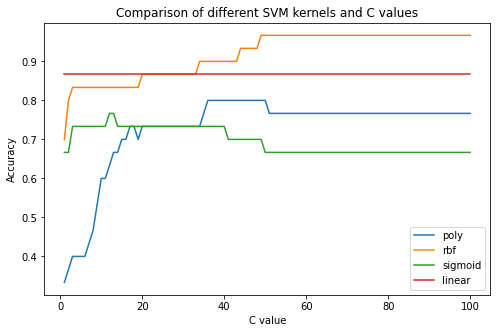

In [194]:
plt.figure(figsize=(8,5))
plt.title("Comparison of different SVM kernels and C values")
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.plot(C_val,accuracies_poly,label='poly')
plt.plot(C_val,accuracies,label='rbf')
plt.plot(C_val,accuracies_sigmoid,label='sigmoid')
plt.plot(C_val,accuracies_linear,label = 'linear')
plt.legend()
plt.show()



In [195]:
scores_kf = cross_val_score(svc, X, y, cv = k_folds)
scores_skf = cross_val_score(svc, X, y, cv = sk_folds)
scores_loo = cross_val_score(svc, X, y, cv = loo)
scores_ss = cross_val_score(svc, X, y, cv = ss)


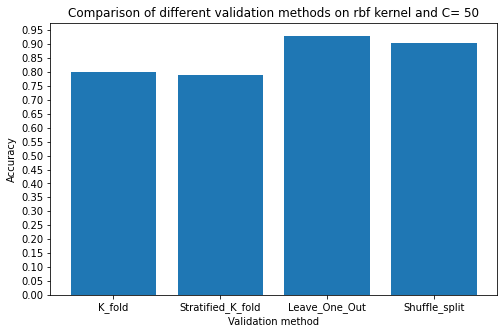

In [204]:
cross_vals = ['K_fold','Stratified_K_fold','Leave_One_Out','Shuffle_split']
results = [scores_kf.mean(),scores_skf.mean(),scores_loo.mean(),scores_ss.mean()]

plt.figure(figsize=(8,5))
plt.title("Comparison of different validation methods on rbf kernel and C= 50")
plt.xlabel("Validation method")
plt.ylabel("Accuracy")
plt.yticks(np.arange(0, 1, 0.05))
plt.bar(cross_vals,results)
plt.show() 


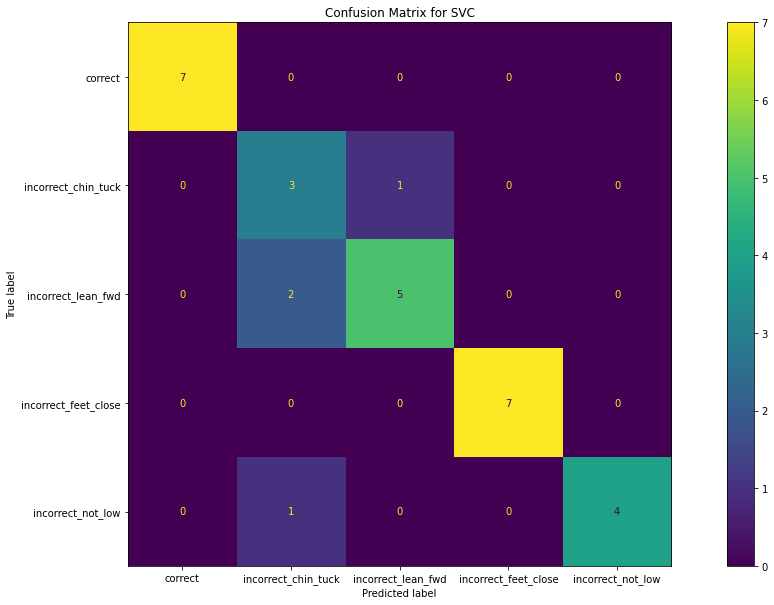

In [279]:
labels = ['correct','incorrect_chin_tuck','incorrect_lean_fwd','incorrect_feet_close','incorrect_not_low']
predictions = svc.predict(X_test)
fig, ax = plt.subplots(figsize=(20, 10))
ConfusionMatrixDisplay.from_predictions(y_test, predictions,ax=ax,display_labels=labels)

# set the title and axis labels for the plot
plt.title('Confusion Matrix for SVC')
plt.xlabel('Predicted label')
plt.ylabel('True label')

# show the plot
plt.show()

# KNC

In [252]:
from sklearn.neighbors import KNeighborsClassifier as KNC


In [264]:
n_neighbors = np.arange(3,20)
weights = ['uniform','distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
p = np.arange(1,3)
params = {'n_neighbors':n_neighbors, 'weights':weights,'algorithm':algorithm,'p':p}


knc = KNC()
knc_tuning = RandomizedSearchCV(knc, params, scoring='accuracy', n_iter=30, cv=3, verbose=2)

knc_tuning.fit(X_train,y_train)



Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e069d0>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d2a7ff940>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25f0fd30>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


[CV] END algorithm=auto, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=14, p=2, weights=distance; total time=   0.0

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d26377040>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

[CV] END algorithm=auto, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d2a7ff940>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25f0f1f0>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


[CV] END algorithm=auto, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=2, weights=distance; total ti

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25f0f5e0>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

[CV] END algorithm=brute, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=16, p=1, weights=distance; total

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d26377040>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


[CV] END algorithm=auto, n_neighbors=10, p=2, weights=distance; total time=   0.0s


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=30,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'p': array([1, 2]),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy', verbose=2)

In [265]:
knc_tuning.best_params_

{'weights': 'distance', 'p': 2, 'n_neighbors': 3, 'algorithm': 'auto'}

In [266]:
knc = KNC(n_neighbors = 3, p = 2, algorithm = 'auto',weights='distance')


In [268]:
knc.fit(X_train,y_train)
knc.score(X_test,y_test)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d262b1430>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


0.8333333333333334

In [269]:
scores_kf_knc = cross_val_score(knc, X, y, cv = k_folds)
scores_skf_knc = cross_val_score(knc, X, y, cv = sk_folds)
scores_loo_knc = cross_val_score(knc, X, y, cv = loo)
scores_ss_knc = cross_val_score(knc, X, y, cv = ss)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06af0>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06f70>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06dc0>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06af0>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06d30>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06e50>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Threadp

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06d30>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06d30>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06d30>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06dc0>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06dc0>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06d30>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06f70>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06af0>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06f70>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06d30>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06d30>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06d30>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06af0>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06f70>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06d30>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06e50>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06e50>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06dc0>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06dc0>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06af0>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06d30>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06e50>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06d30>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06f70>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06d30>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d25e06af0>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

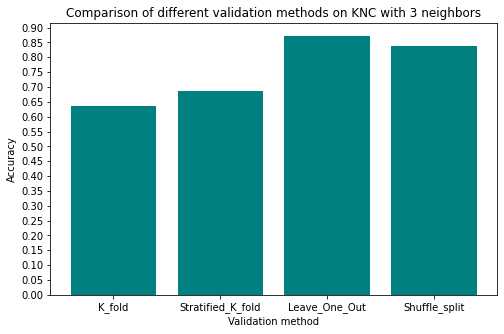

In [277]:
results_knc = [scores_kf_knc.mean(),scores_skf_knc.mean(),scores_loo_knc.mean(),scores_ss_knc.mean()]

plt.figure(figsize=(8,5))
plt.title("Comparison of different validation methods on KNC with 3 neighbors")
plt.xlabel("Validation method")
plt.ylabel("Accuracy")
plt.yticks(np.arange(0, 1, 0.05))
plt.bar(cross_vals,results_knc,color='teal')
plt.show()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9d2438b310>
Traceback (most recent call last):
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tudor/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


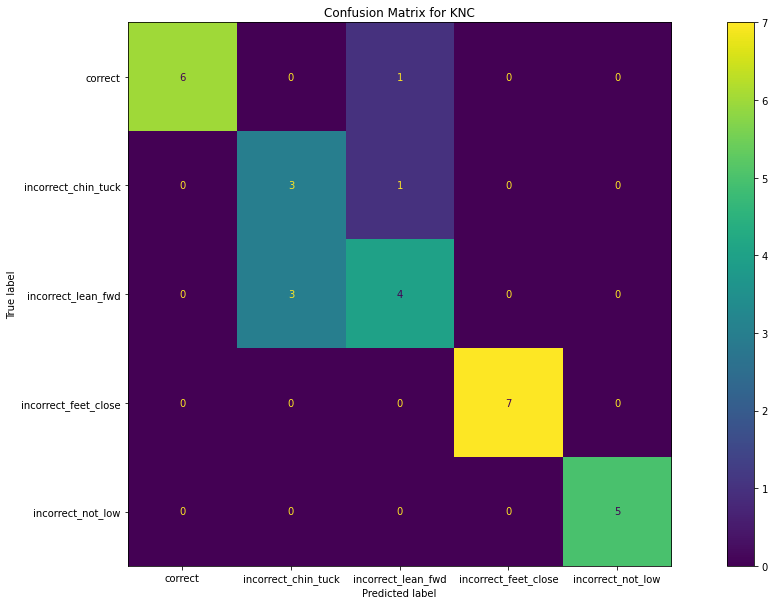

In [278]:
predictions_knc = knc.predict(X_test)
fig, ax = plt.subplots(figsize=(20, 10))
ConfusionMatrixDisplay.from_predictions(y_test, predictions_knc,ax=ax,display_labels=labels)

# set the title and axis labels for the plot
plt.title('Confusion Matrix for KNC')
plt.xlabel('Predicted label')
plt.ylabel('True label')

# show the plot
plt.show()

# Decision Tree

In [280]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [282]:
dtc = DTC()
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.5666666666666667

In [294]:
criterion = ['gini', 'entropy', 'log_loss']
max_depth = np.arange(1,150)
random_state = np.arange(0,300)
max_leaf_nodes = np.arange(1,150)
params ={'criterion':criterion,'max_depth':max_depth,'random_state':random_state,'max_leaf_nodes':max_leaf_nodes}


dtc_tuning = RandomizedSearchCV(dtc, params, scoring='accuracy', n_iter=30, cv=3, verbose=2)

dtc_tuning.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END criterion=gini, max_depth=91, max_leaf_nodes=104, random_state=53; total time=   0.0s
[CV] END criterion=gini, max_depth=91, max_leaf_nodes=104, random_state=53; total time=   0.0s
[CV] END criterion=gini, max_depth=91, max_leaf_nodes=104, random_state=53; total time=   0.0s
[CV] END criterion=entropy, max_depth=123, max_leaf_nodes=68, random_state=106; total time=   0.0s
[CV] END criterion=entropy, max_depth=123, max_leaf_nodes=68, random_state=106; total time=   0.0s
[CV] END criterion=entropy, max_depth=123, max_leaf_nodes=68, random_state=106; total time=   0.0s
[CV] END criterion=log_loss, max_depth=144, max_leaf_nodes=41, random_state=291; total time=   0.0s
[CV] END criterion=log_loss, max_depth=144, max_leaf_nodes=41, random_state=291; total time=   0.0s
[CV] END criterion=log_loss, max_depth=144, max_leaf_nodes=41, random_state=291; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=

[CV] END criterion=log_loss, max_depth=112, max_leaf_nodes=25, random_state=292; total time=   0.0s


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=30,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  7...
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
       234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246,
       247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259,
       260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272,
       273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285,
       286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298,
       299])},
                   scoring='accuracy', verbose=2)

In [295]:
dtc_tuning.best_params_

{'random_state': 262,
 'max_leaf_nodes': 130,
 'max_depth': 120,
 'criterion': 'entropy'}

In [296]:
dtc_tuned = DTC(random_state = 262, max_leaf_nodes = 130, max_depth = 120, criterion = 'entropy')

dtc_tuned.fit(X_train,y_train)
dtc_tuned.score(X_test,y_test)

0.7333333333333333

In [297]:
scores_kf_dtc = cross_val_score(dtc_tuned, X, y, cv = k_folds)
scores_skf_dtc = cross_val_score(dtc_tuned, X, y, cv = sk_folds)
scores_loo_dtc = cross_val_score(dtc_tuned, X, y, cv = loo)
scores_ss_dtc = cross_val_score(dtc_tuned, X, y, cv = ss)

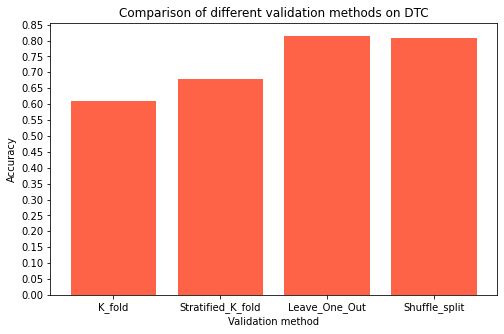

In [300]:
results_dtc = [scores_kf_dtc.mean(),scores_skf_dtc.mean(),scores_loo_dtc.mean(),scores_ss_dtc.mean()]

plt.figure(figsize=(8,5))
plt.title("Comparison of different validation methods on DTC")
plt.xlabel("Validation method")
plt.ylabel("Accuracy")
plt.yticks(np.arange(0, 1, 0.05))
plt.bar(cross_vals,results_dtc,color='tomato')
plt.show()

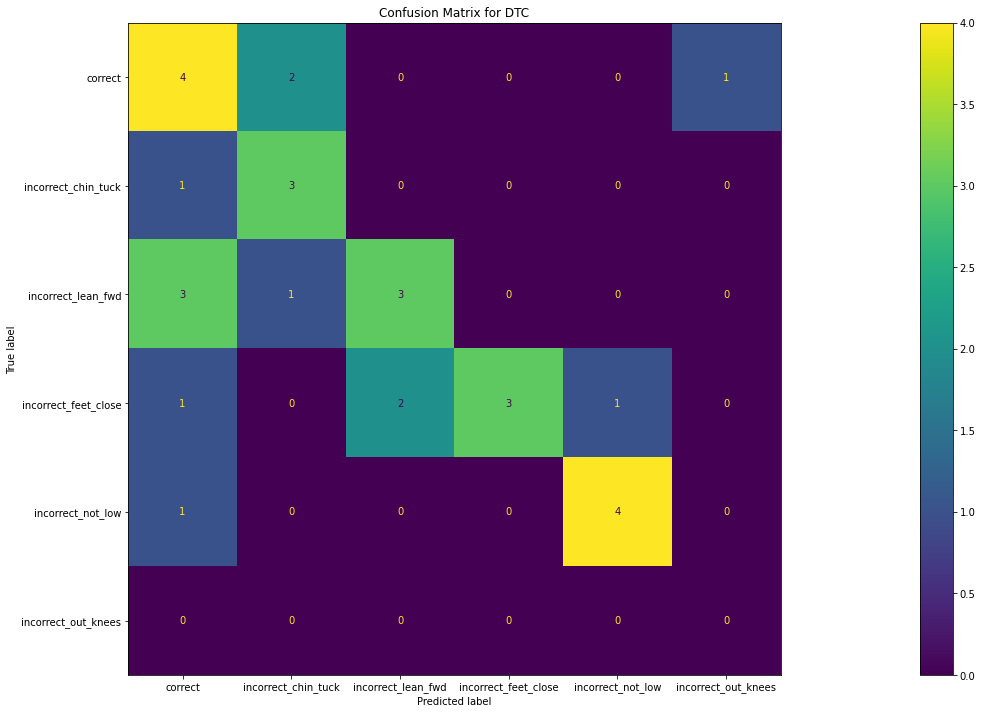

In [313]:
labels_dtc = ['correct','incorrect_chin_tuck','incorrect_lean_fwd','incorrect_feet_close','incorrect_not_low','incorrect_out_knees']

predictions_dtc = dtc.predict(X_test)
fig, ax = plt.subplots(figsize=(50, 12))
ConfusionMatrixDisplay.from_predictions(y_test, predictions_dtc,ax=ax,display_labels=labels_dtc)

# set the title and axis labels for the plot
plt.title('Confusion Matrix for DTC')
plt.xlabel('Predicted label')
plt.ylabel('True label')

# show the plot
plt.show()

# Random Forest

In [314]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [323]:
rfc = RFC(15,random_state = 262, max_leaf_nodes = 130, max_depth = 120, criterion = 'entropy')

In [324]:
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.7333333333333333

In [325]:
num_models = np.arange(1,31)
scores_rfc =[]
for i in num_models:
    rfc = RFC(i,random_state = 262, max_leaf_nodes = 130, max_depth = 120, criterion = 'entropy')
    rfc.fit(X_train,y_train)
    score =rfc.score(X_test,y_test)
    scores_rfc.append(score)
    

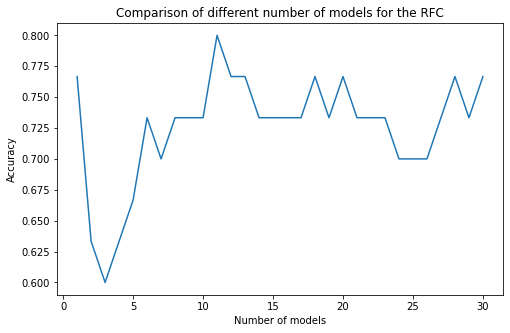

In [327]:
plt.figure(figsize=(8,5))
plt.title("Comparison of different number of models for the RFC")
plt.xlabel("Number of models")
plt.ylabel("Accuracy")
plt.plot(num_models,scores_rfc)

In [337]:
#10 models works best

rfc_tuned = RFC(10,random_state = 262, max_leaf_nodes = 130, max_depth = 120, criterion = 'entropy')


In [338]:
scores_kf_rfc = cross_val_score(rfc_tuned, X, y, cv = k_folds)
scores_skf_rfc = cross_val_score(rfc_tuned, X, y, cv = sk_folds)
scores_loo_rfc = cross_val_score(rfc_tuned, X, y, cv = loo)
scores_ss_rfc = cross_val_score(rfc_tuned, X, y, cv = ss)


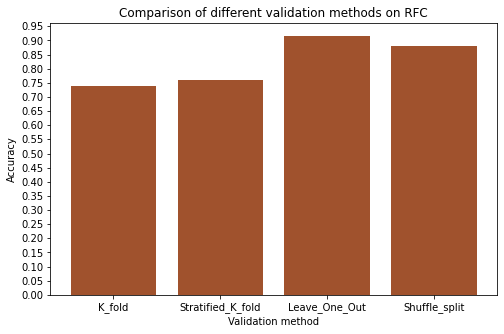

In [344]:
results_rfc = [scores_kf_rfc.mean(),scores_skf_rfc.mean(),scores_loo_rfc.mean(),scores_ss_rfc.mean()]

plt.figure(figsize=(8,5))
plt.title("Comparison of different validation methods on RFC")
plt.xlabel("Validation method")
plt.ylabel("Accuracy")
plt.yticks(np.arange(0, 1, 0.05))
plt.bar(cross_vals,results_rfc,color='sienna')
plt.show()

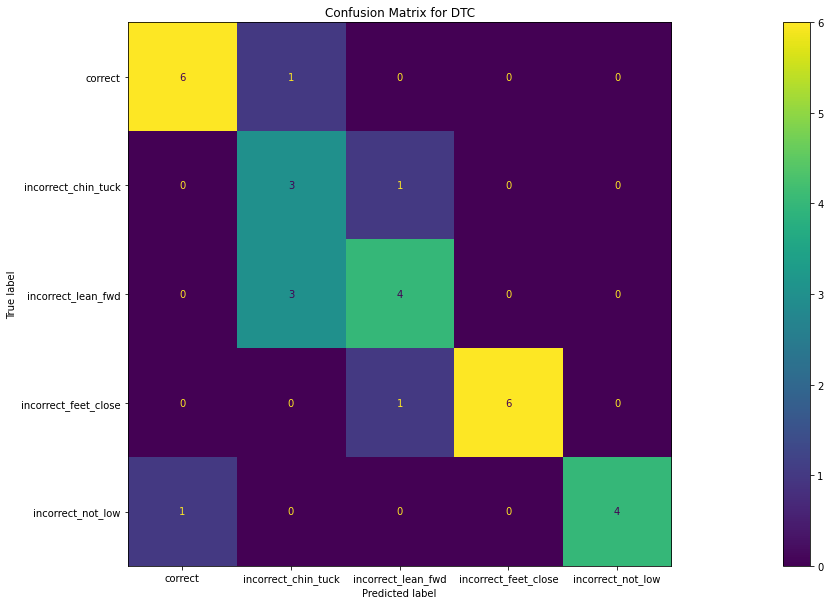

In [347]:

predictions_rfc = rfc.predict(X_test)
fig, ax = plt.subplots(figsize=(40, 10))
ConfusionMatrixDisplay.from_predictions(y_test, predictions_rfc,ax=ax,display_labels=labels)

# set the title and axis labels for the plot
plt.title('Confusion Matrix for DTC')
plt.xlabel('Predicted label')
plt.ylabel('True label')

# show the plot
plt.show()